In [41]:
!pip install pydotplus
!pip install graphviz
!pip install mlxtend

In [42]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
ans=[0]*5

In [43]:
#Import the dataset and define the feature as well as the target datasets / columns 
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [44]:
#We drop the animal names since this is not a good feature to split the data on. 
data.drop(['animal_name'], axis = 1, inplace = True)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [45]:
data.shape

(101, 17)

In [46]:
data.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

In [47]:
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
features = data[feature_names]
label = data.class_type

In [48]:
data.groupby('class_type').class_type.count()

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: class_type, dtype: int64

In [49]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [50]:
#Write a function to find the entropy on a split "target_col"
import math
def entropy(target_name):
    count = [0]*10
    for i in list(data.index):
        count[data.loc[i, target_name]] += 1
    total = sum(count)
    fraction = [0]*10
    for i in range(len(count)):
        fraction[i] = count[i]/total
    res = 0
    for item in fraction:
        if item!=0:
            res+=(item*math.log2(item))
    res = -res
    return res

In [51]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
entropy_values = []
for item in feature_names:
    entropy_values.append(entropy(item))
print("--The entropy of all the fetures are as follows--")
for i in range(len(feature_names)):
    print(feature_names[i], ":", entropy_values[i])

--The entropy of all the fetures are as follows--
hair : 0.9840304711717017
feathers : 0.7179499765002912
eggs : 0.9794662187017298
milk : 0.9743197211096903
airborne : 0.7910662980902585
aquatic : 0.9396846718728563
predator : 0.9914266810680207
toothed : 0.9685867165455516
backbone : 0.6761627418829198
breathes : 0.7374895672137456
venomous : 0.3993820824245975
fins : 0.653839880626333
legs : 2.0338113440641234
tail : 0.8228368841492257
domestic : 0.5538976334852962
catsize : 0.9880162151534646


In [52]:
#Find the entropy of the feature "toothed"
ans[0] = entropy('toothed')
ans[0]

0.9685867165455516

In [53]:
#Write a function to calculate Information Gain on a split attribute and a target column
def weighted_entropy(target_name, arr):
    if len(arr)==0:
        return 0
    count = [0]*10
    for i in arr:
        count[data.loc[i, target_name]] += 1
    total = sum(count)
    fraction = [0]*10
    for i in range(len(count)):
        fraction[i] = count[i]/total
    res = 0
    for item in fraction:
        if item!=0:
            res+=(item*math.log2(item))
    res = -res
    return res


def InfoGain(data,split_attribute_name,target_name="class"):       
    #Calculate the entropy of the total dataset  
    ent = entropy(target_name)
    #Calculate the values and the corresponding counts for the split attribute   
    index = [[] for i in range(11)]
    for i in list(data.index):
        index[data.loc[i, split_attribute_name]].append(i)
    length = []
    for item in index:
        length.append(len(item))
    #Calculate the weighted entropy  
    weighted_ent = []
    for item in index:
        weighted_ent.append(weighted_entropy(target_name, item))
    #Calculate the information gain  
    res = 0
    for i in range(len(index)):
        res+=(length[i]/sum(length))*weighted_ent[i]
    return ent - res

In [54]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
ans[1] = InfoGain(data, "hair", "milk")
ans[1]

0.6599660577558698

In [55]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
for i in range(len(feature_names)):
    print(feature_names[i], ":", InfoGain(data, "milk", feature_names[i]))

hair : 0.6599660577558697
feathers : 0.17242769884415887
eggs : 0.7870598185734241
milk : 0.9743197211096903
airborne : 0.11370352314621812
aquatic : 0.10181386403185955
predator : 0.000636777244021336
toothed : 0.3465412540071715
backbone : 0.15262359382508262
breathes : 0.18259765312929555
venomous : 0.06284178150207947
fins : 0.018672543666944375
legs : 0.36709133269262484
tail : 0.03350320459269063
domestic : 0.01901013577509325
catsize : 0.2509271768405701


In [56]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, train_size = 0.8)

In [57]:
#Fit the given data
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
#Make a prediction on the test data and return the percentage of accuracy
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy is:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy is:", accuracy_score(y_test, y_pred_test))
ans[2] = accuracy_score(y_test, y_pred_test) 

Training Accuracy is: 0.825
Testing Accuracy is: 0.8571428571428571


In [59]:
#Run this cell to visualize the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph
# Image(graph.create_png())

-----------------Classification Report-------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.25      1.00      0.40         1

    accuracy                           0.86        21
   macro avg       0.54      0.67      0.57        21
weighted avg       0.82      0.86      0.83        21

-----------------Confusion Matrix-------------------


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28340d78288>)

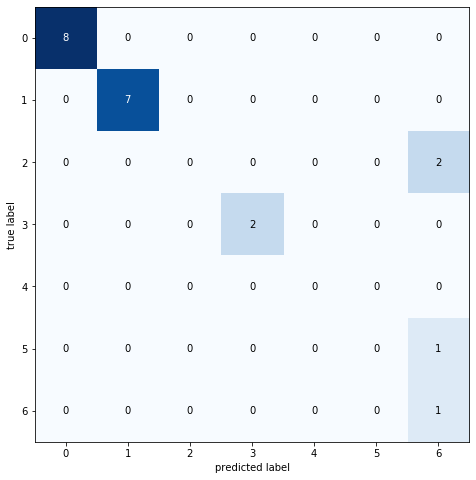

In [60]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
print('-----------------Classification Report-------------------')
print(classification_report(y_test, y_pred_test))

print('-----------------Confusion Matrix-------------------')
mat = confusion_matrix(y_test, y_pred_test, labels = [1, 2, 3, 4, 5, 6, 7])
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))

In [61]:
#Find the recall,f1-score for class type '3'
from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, y_pred_test, average = None, labels=[1, 2, 3, 4, 5, 6, 7])
f1 = f1_score(y_test, y_pred_test, average = None, labels=[1, 2, 3, 4, 5, 6, 7])

ans[3] = (recall[2], f1[2])
ans[3]

(0.0, 0.0)

In [62]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('root_mean_absolute_error:', rmse)

mean_absolute_error: 0.42857142857142855
mean_squared_error: 1.5714285714285714
root_mean_absolute_error: 1.2535663410560174


In [63]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4] = [mae, rmse]
ans[4]

[0.42857142857142855, 1.2535663410560174]

In [64]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "group49_sknishant1@gmail.com_Saurav_Kumar_Nishant_DecisionTrees"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [65]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'group49_sknishant1@gmail.com_Saurav_Kumar_Nishant_DecisionTrees',
 'status': 'Success'}
